In [663]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import accuracy_score

### DATASET 1 - CUSTDATA

In [664]:
df_1 = pd.read_csv('2_custData.csv')

In [665]:
df_1.head()

,age,income,student,credit_rating,class
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes


In [666]:
labelencoder = LabelEncoder()
df_1.iloc[:, 0] = labelencoder.fit_transform(df_1.iloc[:, 0])
df_1.iloc[:, 1] = labelencoder.fit_transform(df_1.iloc[:, 1])
df_1.iloc[:, 2] = labelencoder.fit_transform(df_1.iloc[:, 2])
df_1.iloc[:, 3] = labelencoder.fit_transform(df_1.iloc[:, 3])

C:\Users\dell_\AppData\Local\Temp\ipykernel_8516\919114581.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_1.iloc[:, 0] = labelencoder.fit_transform(df_1.iloc[:, 0])
C:\Users\dell_\AppData\Local\Temp\ipykernel_8516\919114581.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_1.iloc[:, 1] = labelencoder.fit_transform(df_1.iloc[:, 1])
C:\Users\dell_\AppData\Local\Temp\ipykernel_8516\919114581.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a n

In [667]:
df_1['class'] = df_1['class'].map({'yes': 1, 'no': 0})

In [668]:
df_1.head()

,age,income,student,credit_rating,class
0,2,0,0,1,0
1,2,0,0,0,0
2,0,0,0,1,1
3,1,2,0,1,1
4,1,1,1,1,1


In [669]:
X_1 = df_1.iloc[:, :-1]
y_1 = df_1.iloc[:, -1]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = .3, random_state = 1010)

In [670]:
BernNB = BernoulliNB(binarize = 0.5, alpha = 0.5, fit_prior = False)
BernNB.fit(X_train_1, y_train_1)
print(BernNB)
y_expect_1 = y_test_1
y_pred_BernNB_1 = BernNB.predict(X_test_1)
print(accuracy_score(y_expect_1, y_pred_BernNB_1))

BernoulliNB(alpha=0.5, binarize=0.5, fit_prior=False)
0.6


In [671]:
MultiNB = MultinomialNB(alpha = 0.5, fit_prior = False, class_prior=None)
MultiNB.fit(X_train_1, y_train_1)
print(MultiNB)
y_pred_MultiNB_1 = MultiNB.predict(X_test_1)
print(accuracy_score(y_expect_1, y_pred_MultiNB_1))

MultinomialNB(alpha=0.5, fit_prior=False)
0.6


In [672]:
GaussNB = GaussianNB()
GaussNB.fit(X_train_1, y_train_1)
print(GaussNB)
y_pred_GaussNB_1 = GaussNB.predict(X_test_1)
print(accuracy_score(y_expect_1, y_pred_GaussNB_1))

GaussianNB()
0.4


In [673]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test_1, y_pred_BernNB_1))
accuracy_score(y_test_1, y_pred_BernNB_1)

[[1 2]
 [0 2]]


0.6

In [674]:
print(confusion_matrix(y_test_1, y_pred_MultiNB_1))
accuracy_score(y_test_1, y_pred_MultiNB_1)

[[1 2]
 [0 2]]


0.6

In [675]:
print(confusion_matrix(y_test_1, y_pred_GaussNB_1))
accuracy_score(y_test_1, y_pred_GaussNB_1)

[[0 3]
 [0 2]]


0.4

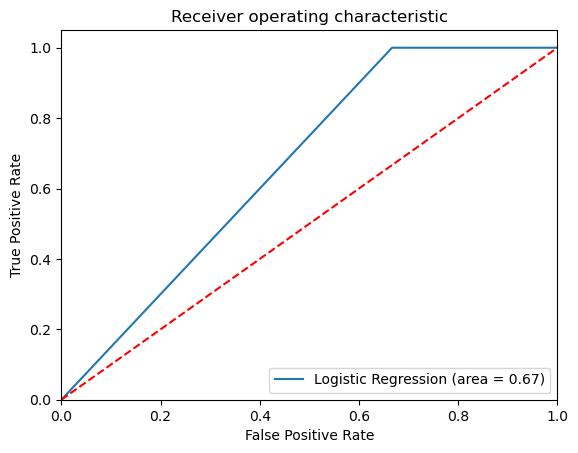

In [676]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_1,y_pred_BernNB_1)
fpr, tpr, thresholds = roc_curve(y_test_1,y_pred_BernNB_1)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

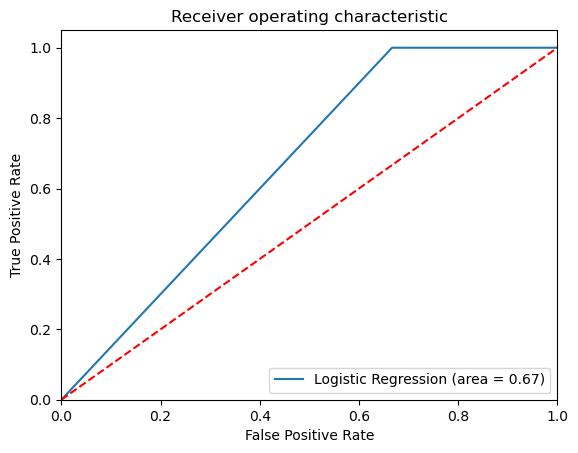

In [677]:
logit_roc_auc = roc_auc_score(y_test_1,y_pred_MultiNB_1)
fpr, tpr, thresholds = roc_curve(y_test_1,y_pred_MultiNB_1)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

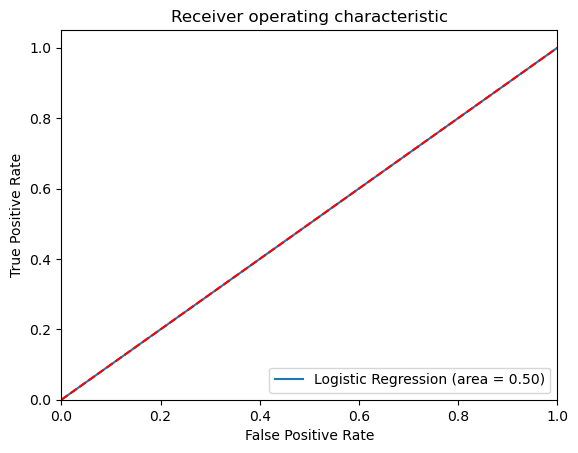

In [678]:
logit_roc_auc = roc_auc_score(y_test_1,y_pred_GaussNB_1)
fpr, tpr, thresholds = roc_curve(y_test_1,y_pred_GaussNB_1)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### DATASET 2 - FERTILITY

In [679]:
df_2 = pd.read_csv('2_Fertility.csv')
df_2.head()

,season,age,Ch_Disease,Accident,Surg_Int,H_Fever,Alcohol_Cons,Smoke,N_Hours,Diag
0,Summer,32,No,Yes,Yes,Greater th 3m,Hardly ever or never,Daily,1,Normal
1,Fall,32,No,No,No,Greater th 3m,Several times a week,Occasional,2,Normal
2,Winter,30,Yes,No,No,Greater th 3m,Several times a week,Never,3,Normal
3,Spring,31,No,No,No,Greater th 3m,Several times a week,Never,3,Normal
4,Spring,30,No,Yes,No,Greater th 3m,Once a week,Never,3,Normal


In [680]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   season        100 non-null    object
 1   age           100 non-null    object
 2   Ch_Disease    100 non-null    object
 3   Accident      100 non-null    object
 4   Surg_Int      100 non-null    object
 5   H_Fever       100 non-null    object
 6   Alcohol_Cons  100 non-null    object
 7   Smoke         100 non-null    object
 8   N_Hours       100 non-null    int64 
 9   Diag          100 non-null    object
dtypes: int64(1), object(9)
memory usage: 7.9+ KB


In [681]:
import re

for column in df_2.columns:
    for value in df_2[column]:
        if isinstance(value, str):
            match = re.search('[^A-Za-z0-9\s]+', value)
            if match:
                print(f"Valor extraño encontrado en la columna {column}: {value}")
                
df_2['age'].replace('?', np.nan, inplace=True)
df_2['Accident'].replace('?', np.nan, inplace=True)
df_2['Surg_Int'].replace('?', np.nan, inplace=True)
df_2['Alcohol_Cons'].replace('?', np.nan, inplace=True)

Valor extraño encontrado en la columna age: ?
Valor extraño encontrado en la columna age: ?
Valor extraño encontrado en la columna Accident: ?
Valor extraño encontrado en la columna Surg_Int: ?
Valor extraño encontrado en la columna Alcohol_Cons: ?
Valor extraño encontrado en la columna Alcohol_Cons: ?
Valor extraño encontrado en la columna Alcohol_Cons: ?


<>:6: DeprecationWarning: invalid escape sequence \s
<>:6: DeprecationWarning: invalid escape sequence \s
C:\Users\dell_\AppData\Local\Temp\ipykernel_8516\268515839.py:6: DeprecationWarning: invalid escape sequence \s
  match = re.search('[^A-Za-z0-9\s]+', value)


In [682]:
df_2.replace('nan', np.nan, inplace=True)
for i in df_2.columns:
    if df_2[i].isnull().sum() == 0 or df_2[i].isna().sum() == 0 or df_2[i].isnull().sum() == 0 and df_2[i].isna().sum() == 0:
        print('No hay valores nulos en',i)
    else:
        print('Si hay valores nulos en',i,'{:.2f}%'.format(df_2[i].isnull().sum()/len(df_2[i])*100),df_2[i].dtype)

No hay valores nulos en season
Si hay valores nulos en age 2.00% object
No hay valores nulos en Ch_Disease
Si hay valores nulos en Accident 1.00% object
Si hay valores nulos en Surg_Int 1.00% object
No hay valores nulos en H_Fever
Si hay valores nulos en Alcohol_Cons 3.00% object
No hay valores nulos en Smoke
No hay valores nulos en N_Hours
No hay valores nulos en Diag


In [683]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   season        100 non-null    object
 1   age           98 non-null     object
 2   Ch_Disease    100 non-null    object
 3   Accident      99 non-null     object
 4   Surg_Int      99 non-null     object
 5   H_Fever       100 non-null    object
 6   Alcohol_Cons  97 non-null     object
 7   Smoke         100 non-null    object
 8   N_Hours       100 non-null    int64 
 9   Diag          100 non-null    object
dtypes: int64(1), object(9)
memory usage: 7.9+ KB


In [684]:
print(df_2['age'].unique())
print(df_2['Accident'].unique())
print(df_2['Surg_Int'].unique())
print(df_2['Alcohol_Cons'].unique())

['32' '30' '31' '28' '34' '29' '33' '36' '27' nan]
['Yes' 'No' nan]
['Yes' 'No' nan]
['Hardly ever or never' 'Several times a week' 'Once a week'
 'Several times a day' nan 'Every day']


In [685]:
df_2['age'] = pd.to_numeric(df_2['age'], errors='coerce')
mean_age = df_2['age'].mean()
df_2['age'] = df_2['age'].fillna(mean_age)

for col in ['Accident', 'Surg_Int', 'Alcohol_Cons']:
    df_2[col] = df_2[col].fillna(df_2[col].mode()[0])
    
print(df_2['age'].unique())
print(df_2['Accident'].unique())
print(df_2['Surg_Int'].unique())
print(df_2['Alcohol_Cons'].unique())

df_2.info()

[32.        30.        31.        28.        34.        29.
 33.        36.        27.        29.7244898]
['Yes' 'No']
['Yes' 'No']
['Hardly ever or never' 'Several times a week' 'Once a week'
 'Several times a day' 'Every day']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        100 non-null    object 
 1   age           100 non-null    float64
 2   Ch_Disease    100 non-null    object 
 3   Accident      100 non-null    object 
 4   Surg_Int      100 non-null    object 
 5   H_Fever       100 non-null    object 
 6   Alcohol_Cons  100 non-null    object 
 7   Smoke         100 non-null    object 
 8   N_Hours       100 non-null    int64  
 9   Diag          100 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.9+ KB


In [686]:
le = preprocessing.LabelEncoder()
df_2['season']=le.fit_transform(df_2.loc[:, 'season'])
df_2['Ch_Disease']=le.fit_transform(df_2.loc[:, 'Ch_Disease'])
df_2['Accident']=le.fit_transform(df_2.loc[:, 'Accident'])
df_2['Surg_Int']=le.fit_transform(df_2.loc[:, 'Surg_Int'])
df_2['H_Fever']=le.fit_transform(df_2.loc[:, 'H_Fever'])
df_2['Alcohol_Cons']=le.fit_transform(df_2.loc[:, 'Alcohol_Cons'])
df_2['Smoke']=le.fit_transform(df_2.loc[:, 'Smoke'])
df_2['Diag']=le.fit_transform(df_2.loc[:, 'Diag'])
df_2.head()

,season,age,Ch_Disease,Accident,Surg_Int,H_Fever,Alcohol_Cons,Smoke,N_Hours,Diag
0,2,32.0,0,1,1,0,1,0,1,1
1,0,32.0,0,0,0,0,4,2,2,1
2,3,30.0,1,0,0,0,4,1,3,1
3,1,31.0,0,0,0,0,4,1,3,1
4,1,30.0,0,1,0,0,2,1,3,1


In [687]:
df_2.dtypes

season            int32
age             float64
Ch_Disease        int32
Accident          int32
Surg_Int          int32
H_Fever           int32
Alcohol_Cons      int32
Smoke             int32
N_Hours           int64
Diag              int32
dtype: object

In [688]:
print(df_2['Diag'].value_counts())

1    88
0    12
Name: Diag, dtype: int64


<Axes: >

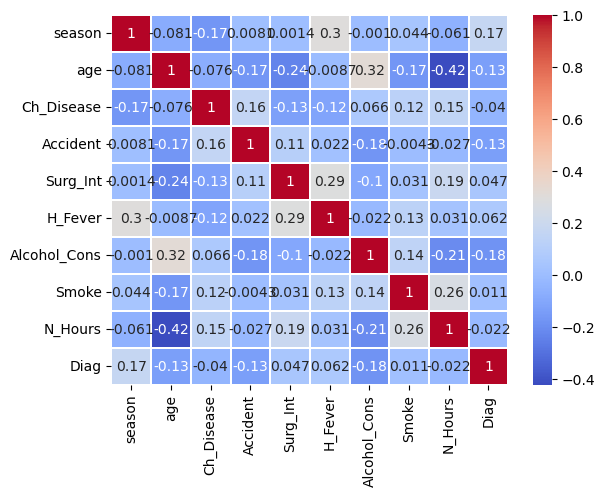

In [689]:
corr = df_2.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm',linewidths=0.2)

<Axes: >

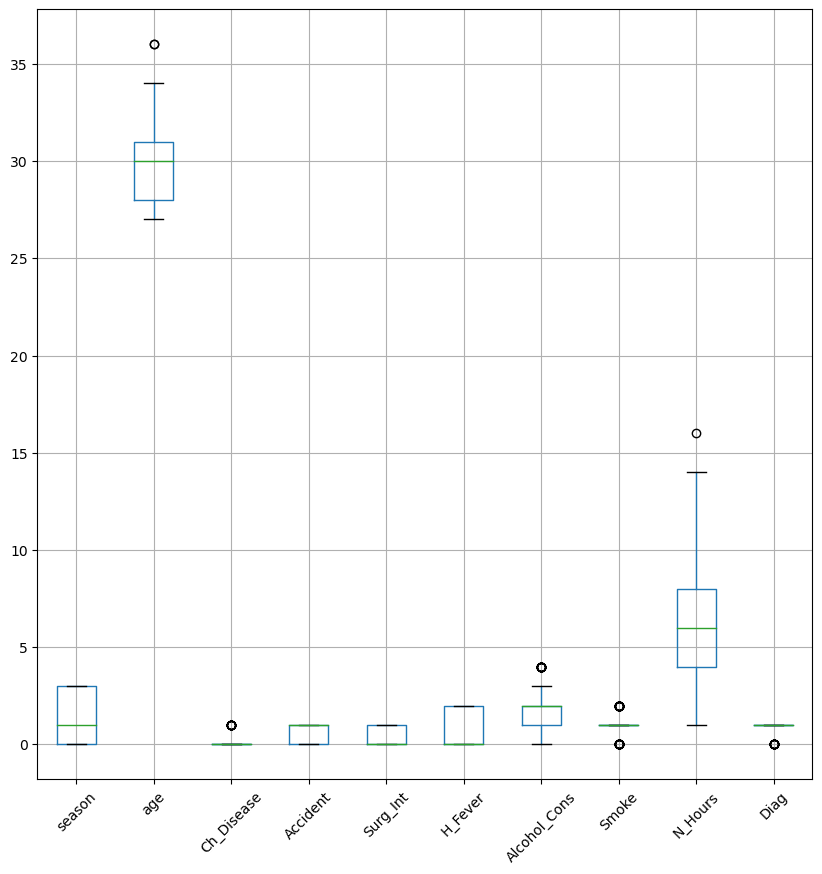

In [690]:
df_2.boxplot(figsize=(10,10), rot=45)

c:\Users\dell_\anaconda3\envs\venv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


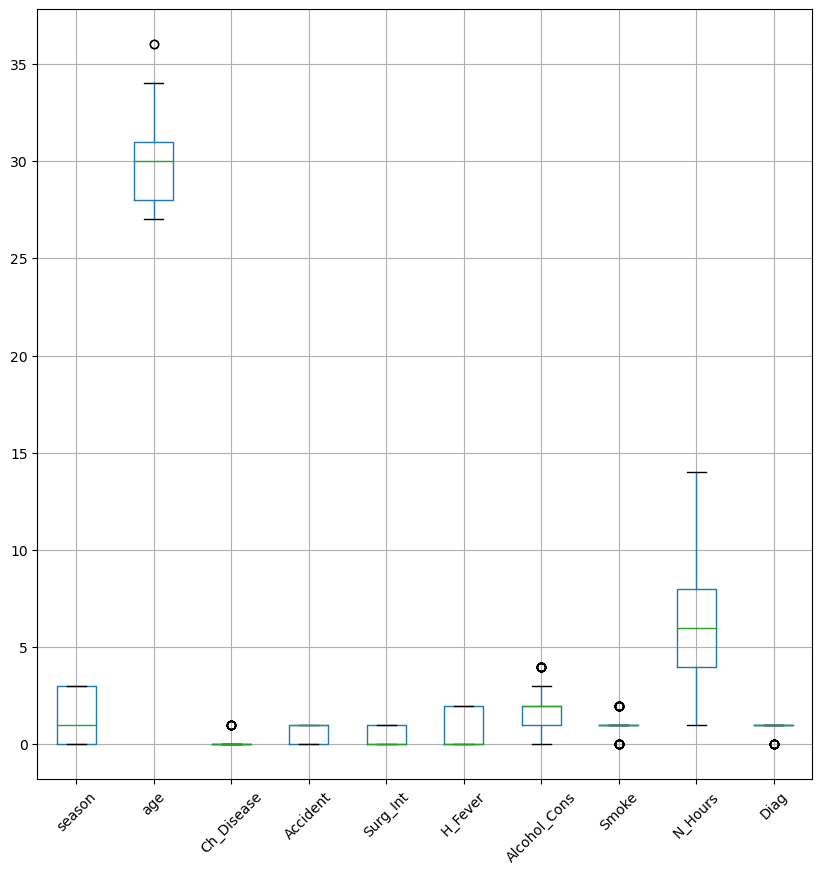

In [691]:
mean_num = np.mean(df_2)
std_num = np.std(df_2)
lower_limit = mean_num - 3 * std_num
upper_limit = mean_num + 3 * std_num
data_filtered_2 = df_2[(df_2 >= lower_limit) & (df_2 <= upper_limit)]
boxplot_2 = data_filtered_2.boxplot(figsize=(10,10), rot=45)


In [692]:
#Procdemos a entrenar el modelo
X_2 = df_2.iloc[:, :-1]
y_2 = df_2.iloc[:, -1]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = .3, random_state = 1010)


In [693]:
BernNB_2 = BernoulliNB(binarize = 0.1, alpha = 0.1, fit_prior = True, class_prior = None)
BernNB_2.fit(X_train_2, y_train_2)
print(BernNB_2)
y_expect_2 = y_test_2
y_pred_BernNB_2 = BernNB_2.predict(X_test_2)
print(accuracy_score(y_expect_2, y_pred_BernNB_2))

BernoulliNB(alpha=0.1, binarize=0.1)
0.8333333333333334


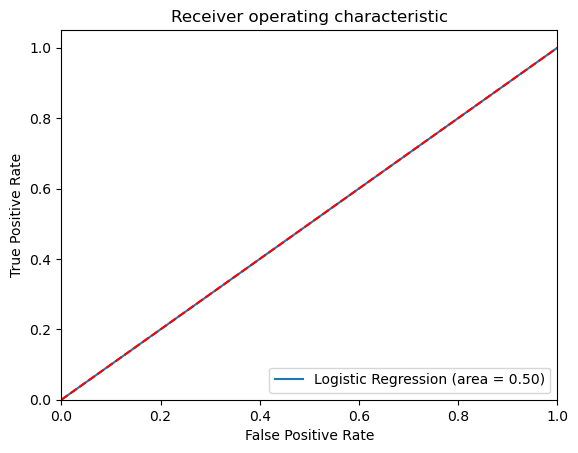

In [694]:
logit_roc_auc = roc_auc_score(y_test_2,y_pred_BernNB_2)
fpr, tpr, thresholds = roc_curve(y_test_2,y_pred_BernNB_2)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [695]:
MultiNB_2 = MultinomialNB(alpha = 0.1, fit_prior = True)
MultiNB_2.fit(X_train_2, y_train_2)
print(MultiNB_2)
y_pred_MultiNB_2 = MultiNB_2.predict(X_test_2)
print(accuracy_score(y_expect_2, y_pred_MultiNB_2))

MultinomialNB(alpha=0.1)
0.8333333333333334


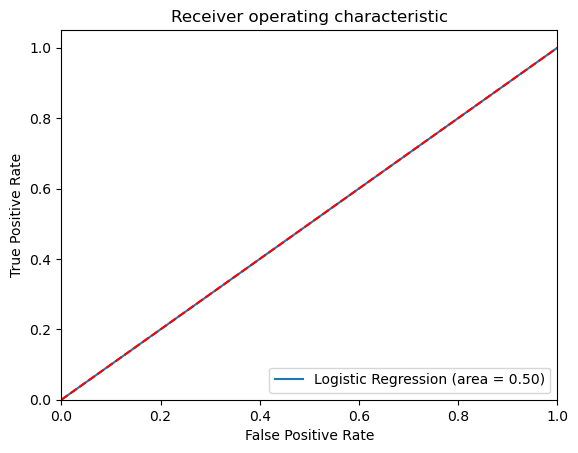

In [696]:
logit_roc_auc = roc_auc_score(y_test_2,y_pred_MultiNB_2)
fpr, tpr, thresholds = roc_curve(y_test_2,y_pred_MultiNB_2)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [697]:
GaussNB_2 = GaussianNB()
GaussNB_2.fit(X_train_2, y_train_2)
print(GaussNB_2)
y_pred_GaussNB_2 = GaussNB_2.predict(X_test_2)
print(accuracy_score(y_expect_2, y_pred_GaussNB_2))

GaussianNB()
0.13333333333333333


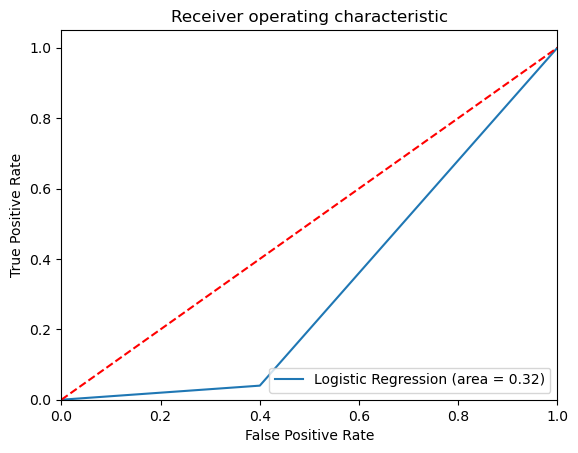

In [698]:
logit_roc_auc = roc_auc_score(y_test_2,y_pred_GaussNB_2)
fpr, tpr, thresholds = roc_curve(y_test_2,y_pred_GaussNB_2)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### DATA SET 3 - STOREDATA

In [699]:
from apyori import apriori
df_3 = pd.read_csv('2_store_data.csv', header=None)
df_3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [700]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [701]:
lista_filas = df_3.values.tolist()
type(lista_filas)

list

In [702]:
for i in df_3.columns:
    print(df_3[i].unique())

['shrimp' 'burgers' 'chutney' 'turkey' 'mineral water' 'low fat yogurt'
 'whole wheat pasta' 'soup' 'frozen vegetables' 'french fries' 'eggs'
 'cookies' 'spaghetti' 'meatballs' 'red wine' 'rice' 'parmesan cheese'
 'ground beef' 'sparkling water' 'herb & pepper' 'pickles' 'energy bar'
 'fresh tuna' 'escalope' 'avocado' 'tomato sauce' 'clothes accessories'
 'energy drink' 'chocolate' 'grated cheese' 'yogurt cake' 'mint'
 'asparagus' 'champagne' 'ham' 'muffins' 'french wine' 'chicken' 'pasta'
 'tomatoes' 'pancakes' 'frozen smoothie' 'carrots' 'yams' 'shallot'
 'butter' 'light mayo' 'pepper' 'candy bars' 'cooking oil' 'milk'
 'green tea' 'bug spray' 'oil' 'olive oil' 'salmon' 'cake' 'almonds'
 'salt' 'strong cheese' 'hot dogs' 'pet food' 'whole wheat rice'
 'antioxydant juice' 'honey' 'sandwich' 'salad' 'magazines' 'protein bar'
 'mayonnaise' 'cider' 'burger sauce' 'green grapes' 'vegetables mix'
 'bramble' 'nonfat milk' 'tomato juice' 'green beans' 'strawberries'
 'eggplant' 'mushroom cre

In [703]:
lista_filas

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['chutney',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['turkey',
  'avocado',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['low fat yogurt',
  nan,
  n

In [708]:
import math
for sublist in lista_filas:
    for i in range(len(sublist)):
        if isinstance(sublist[i], float) and math.isnan(sublist[i]):
            sublist[i] = ''
lista_filas


[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['chutney',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['turkey',
  'avocado',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['low fat yogurt',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
 

In [709]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(lista_filas).transform(lista_filas)
df_lista = pd.DataFrame(te_ary, columns=te.columns_)
print(df_lista)

              asparagus  almonds  antioxydant juice  asparagus  avocado  \
0     False       False     True               True      False     True   
1      True       False    False              False      False    False   
2      True       False    False              False      False    False   
3      True       False    False              False      False     True   
4      True       False    False              False      False    False   
...     ...         ...      ...                ...        ...      ...   
7496   True       False    False              False      False    False   
7497   True       False    False              False      False    False   
7498   True       False    False              False      False    False   
7499   True       False    False              False      False    False   
7500   True       False    False              False      False    False   

      babies food  bacon  barbecue sauce  black tea  ...  turkey  \
0           False  False       

In [711]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df_lista, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(),(burgers),0.999867,0.087188,0.087188,0.087200,1.000133,0.000012,1.000013
1,(burgers),(),0.087188,0.999867,0.087188,1.000000,1.000133,0.000012,inf
2,(),(cake),0.999867,0.081056,0.081056,0.081067,1.000133,0.000011,1.000012
3,(cake),(),0.081056,0.999867,0.081056,1.000000,1.000133,0.000011,inf
4,(),(chicken),0.999867,0.059992,0.059992,0.060000,1.000133,0.000008,1.000009
5,(chicken),(),0.059992,0.999867,0.059992,1.000000,1.000133,0.000008,inf
6,(),(chocolate),0.999867,0.163845,0.163845,0.163867,1.000133,0.000022,1.000026
7,(chocolate),(),0.163845,0.999867,0.163845,1.000000,1.000133,0.000022,inf
8,(),(cookies),0.999867,0.080389,0.080389,0.080400,1.000133,0.000011,1.000012
9,(cookies),(),0.080389,0.999867,0.080389,1.000000,1.000133,0.000011,inf


In [712]:
frequent_itemsets.tail()

,support,itemsets
52,0.050927,"(eggs, mineral water)"
53,0.059725,"(spaghetti, mineral water)"
54,0.052660,"(, chocolate, mineral water)"
55,0.050927,"(, eggs, mineral water)"
56,0.059725,"(, spaghetti, mineral water)"
